In [71]:
from sklearn import metrics, datasets,linear_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
data = datasets.load_diabetes()
print(data.data.shape)


(442, 10)


In [72]:
print(data.feature_names)
print(data.target)


X = data.data
XDF = pd.DataFrame(X,columns= data.feature_names)
print(XDF.head())
XDF['label']=data.target.reshape(-1,1)
print(XDF.head())

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 26

            age       sex       bmi        bp        s1        s2        s3  \
age    1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex    0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi    0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp     0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1     0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2     0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3    -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4     0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5     0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6     0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
label  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

             s4        s5        s6     label  
age

<AxesSubplot:>

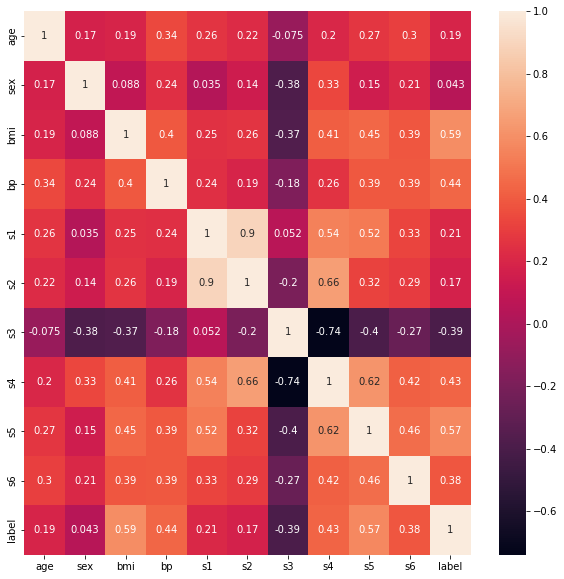

In [73]:
# correlation 
cor = XDF.corr()
print(cor)

plt.figure(10,figsize=(10,10))
sns.heatmap(cor,annot=True)
# pairplotting 


<Figure size 864x864 with 0 Axes>

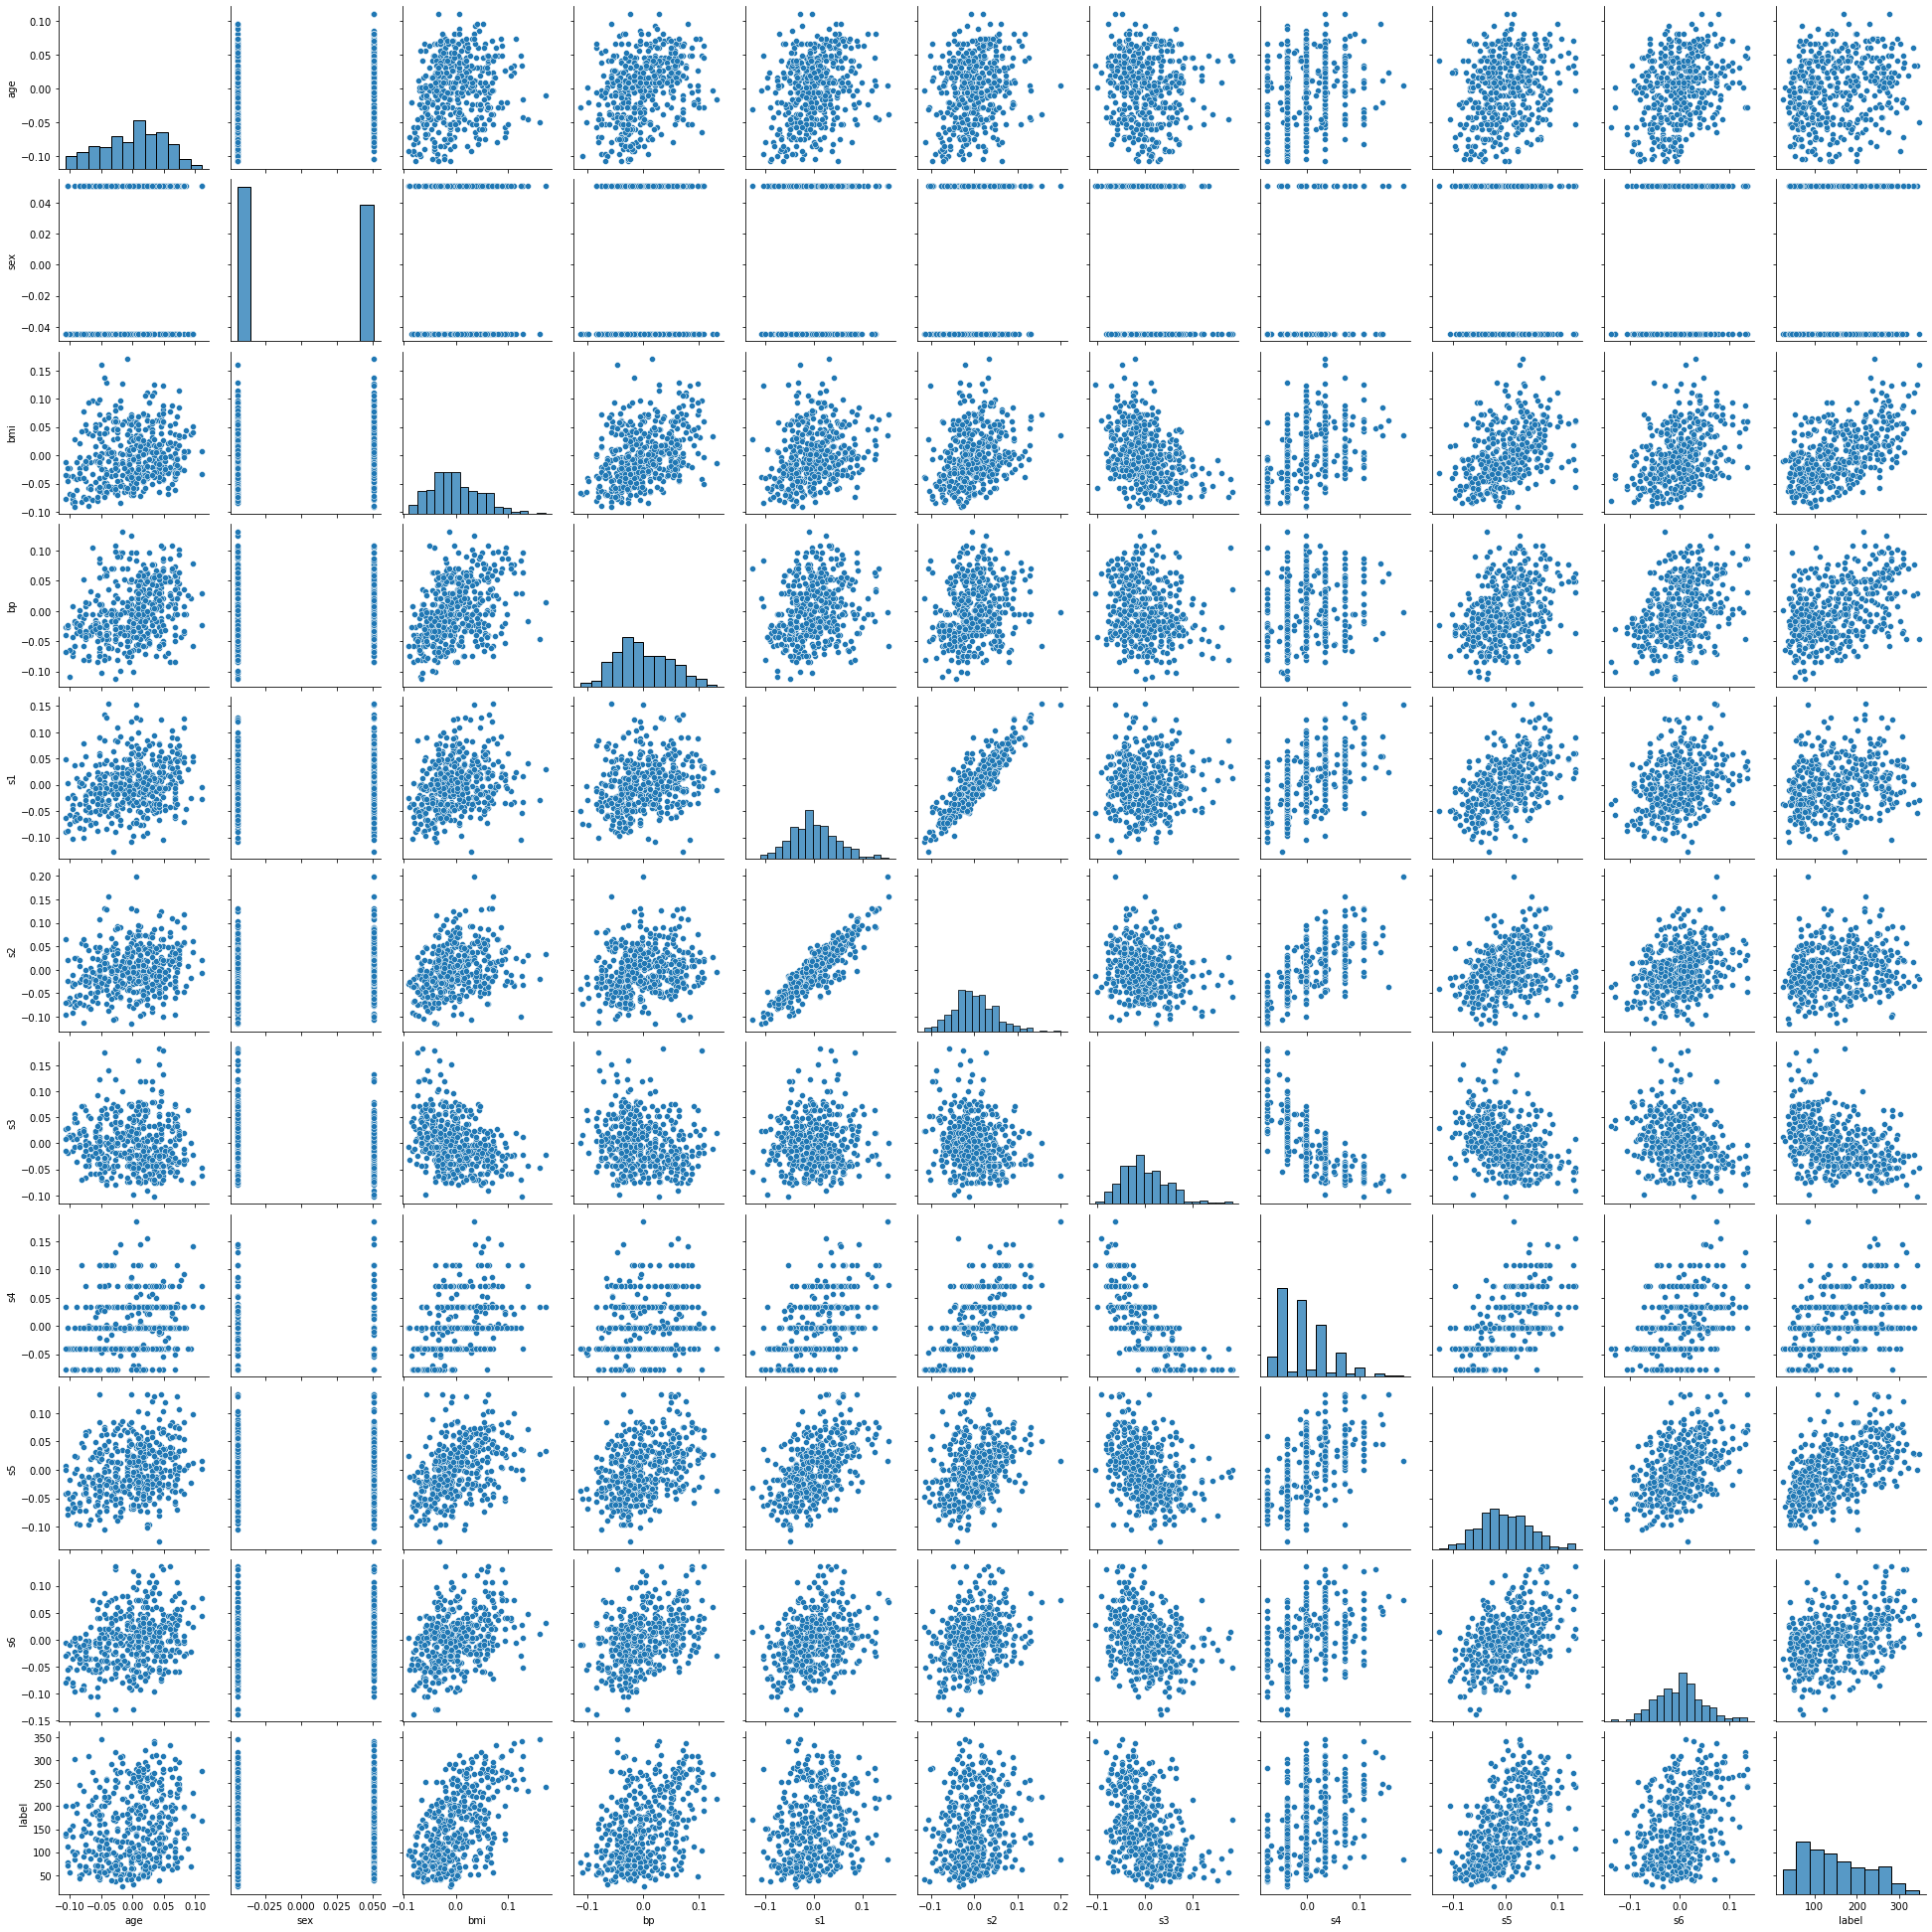

In [74]:
plt.figure(10,figsize=(12,12))
sns.pairplot(XDF)
#


In [75]:
new_data = XDF[['bmi','bp','s4','s5']].values
Y = XDF['label'].values


In [76]:
# divide the data into train and test samples (0.7 and 0.3)

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(new_data,Y,test_size=0.3,random_state=2)


# create the linear reg model 
lmmodel = linear_model.LinearRegression()
lmmodel = lmmodel.fit(Xtrain,ytrain)

ypred = lmmodel.predict(Xtest)


In [77]:
from sklearn import metrics

r2Value = metrics.r2_score(ytest,ypred)
print('r2Score is : ',r2Value)


mse = metrics.mean_squared_error(ytest,ypred)
print('mse is : ',mse)

r2Score is :  0.451452777096801
mse is :  3211.348139270012


In [79]:
outputDF = pd.DataFrame({'Actual':ytest,'Predicted':ypred})
outputDF

,Actual,Predicted
0,73.0,161.903180
1,233.0,232.307012
2,97.0,133.433440
3,111.0,104.523343
4,277.0,267.355608
...,...,...
128,91.0,174.369131
129,72.0,50.279521
130,65.0,144.752009
131,158.0,102.787506


In [80]:
from sklearn import svm 

svmReg = svm.SVR(kernel='sigmoid')
svmReg = svmReg.fit(Xtrain,ytrain)

ypred1 = svmReg.predict(Xtest)

r2Value = metrics.r2_score(ytest,ypred1)
print('r2Score is : ',r2Value)


mse = metrics.mean_squared_error(ytest,ypred1)
print('mse is : ',mse)

r2Score is :  0.3646452959864145
mse is :  3719.543297862129


In [81]:
data1 = pd.read_csv('./weather.csv')
print(data1.shape)

(119040, 31)


/Users/vaseemlondoninternational/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
data1.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

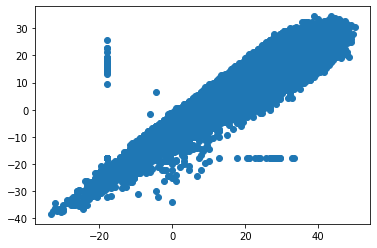

In [87]:
X = data1['MaxTemp'].values.reshape(-1,1)
Y = data1['MinTemp'].values.reshape(-1,1)
plt.scatter(X,Y)

In [88]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=3)

In [89]:
lmModel = linear_model.LinearRegression()
lmModel = lmModel.fit(Xtrain,ytrain)
ypred = lmModel.predict(Xtest)

r2Value = metrics.r2_score(ytest,ypred)
print('r2Score is : ',r2Value)


mse = metrics.mean_squared_error(ytest,ypred)
print('mse is : ',mse)


r2Score is :  0.7711419150930718
mse is :  15.756146355363443


In [90]:
residu = ypred - ytest

/Users/vaseemlondoninternational/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

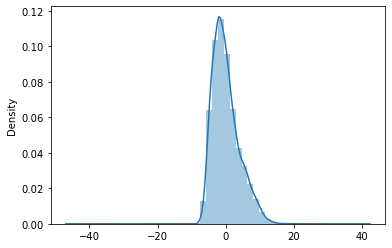

In [92]:
sns.distplot(residu)



/Users/vaseemlondoninternational/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

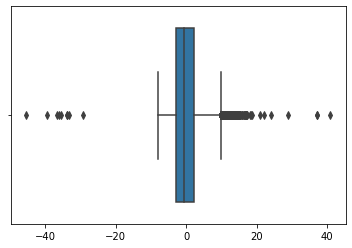

In [93]:
sns.boxplot(residu)